In [1]:
import os
import glob
import warnings
import xarray as xr
from dask.distributed import Client
from mom6 import DATA_PATH
from mom6.mom6_module.mom6_io import MOM6Misc, MOM6Historical
from mom6.mom6_module.mom6_statistics import HistoricalClimatology

In [2]:
client = Client(processes=False,memory_limit='150GB',silence_logs=50)
print(client)
print(client.cluster.dashboard_link)

<Client: 'inproc://10.173.16.6/465505/1' processes=1 threads=64, memory=139.70 GiB>
http://10.173.16.6:8787/status


In [3]:
class_histrun=MOM6Historical('tos',data_relative_dir='hist_run/regrid/',static_relative_dir='static/regrid/',grid='regrid',source='local',chunks={'time':-1,'lon':100,'lat':100})

In [4]:
ds = class_histrun.get_all(freq='daily')

In [5]:
ds

<xarray.Dataset> Size: 26GB
Dimensions:  (time: 9861, lat: 844, lon: 774)
Coordinates:
  * time     (time) datetime64[ns] 79kB 1993-01-01T12:00:00 ... 2019-12-31T12...
  * lon      (lon) float64 6kB 261.6 261.6 261.7 261.8 ... 323.8 323.8 323.9
  * lat      (lat) float64 7kB 5.273 5.335 5.398 5.461 ... 58.04 58.1 58.16
Data variables:
    tos      (time, lat, lon) float32 26GB dask.array<chunksize=(9861, 100, 100), meta=np.ndarray>
Attributes:
    NumFilesInSet:  1
    title:          NWA12_MOM6_v1.0
    grid_type:      regular
    grid_tile:      N/A
    history:        Derived and written at NOAA Physical Science Laboratory
    contact:        chia-wei.hsu@noaa.gov
    dataset:        regional mom6 regrid

In [6]:
class_climo = HistoricalClimatology(ds_data=ds,var_name='tos',time_name='time',time_frequency='dayofyear')

In [7]:
ds_climo = class_climo.generate_climo(climo_end_year=2019,climo_start_year=1993,dask_option='lazy')

smoothed daily climatology (preserve first 4 harmonics)


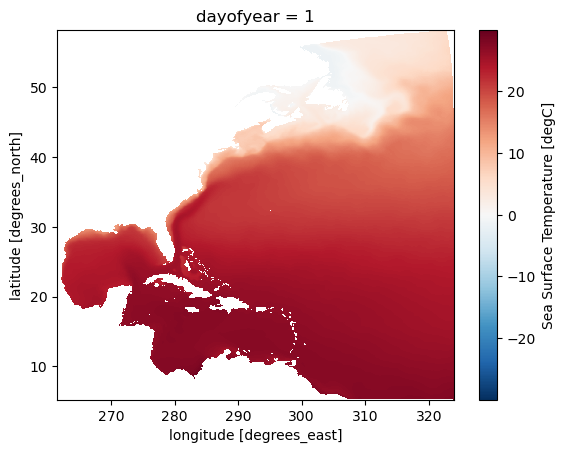

In [9]:
ds_climo.isel(dayofyear=0).plot()